In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Graph Info:
 Name: G
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333
Graph Nodes:
 [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


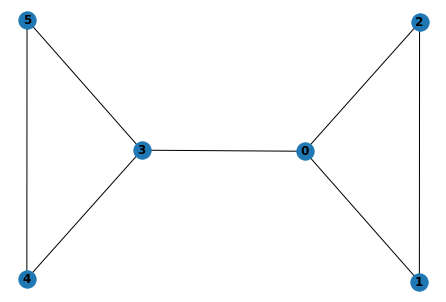

In [ ]:
# Initialize the graph
G = nx.Graph(name='G')

# Create nodes.
# In this tutorial, the graph consists of 6 nodes.
# Each node is assigned node feature which corresponds to the node name.
for i in range(6):
  G.add_node(i, name=i)
  
# Define the edges and add the edges to the graph
edges = [(0, 1), (0, 2), (1, 2), (0, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)

# See graph info
print('Graph Info:\n', nx.info(G))

# Inspect the features:
print('Graph Nodes:\n', G.nodes.data())

# Plot the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
# Get the adjacency matrix (A) and Node Features Matrix (X) as a numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X, axis=1)

print('Shape of A:\n', A.shape)
print('Shape of X:\n', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Feature Matrix (X):\n', X)

Shape of A:
 (6, 6)
Shape of X:
 (6, 1)

Adjacency Matrix (A):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Feature Matrix (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
# To investigate how inserting A into the forward propagation equation changes things,
# we are going to perform the dot product of A and X.
# Dot product Adjacency Matrix (A) and Node Feature Matrix (X)
AX = np.dot(A, X)
print('Dot product of A and X (AX):\n', AX) 

Dot product of A and X (AX):
 [[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


We can see from the dot product *AX* the representation of the sum of neighboring node features. However, we can also identify a problem - while we can now represent and account for the adjacent node features, we aren't taking into account the features of the node itself. 

We will add self-loops (connections back to the node) in order to solve this problem.

In [ ]:
# Add self-loops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
  self_loops.append((i, i))

G_self_loops.add_edges_from(self_loops)

# Check the edges of G_self_loops after adding the self loops
print('Edges of G with self loops:\n', G_self_loops.edges)

# Get the Adjacency Matrix (A) of self loops graph (we will keep our original X, as it will be the same)
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n', A_hat)

#Calculate the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('AX:\n', AX)

Edges of G with self loops:
 [(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Adjacency Matrix of added self-loops G (A_hat):
 [[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
 [[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


In [ ]:
# Get the Degree Matrix of the self loops graph
Deg_Mat = G_self_loops.degree()
print('Degree Matrix of self loops graph:\n', Deg_Mat)

# Convert the degree matrix into an N x N matrix where *N* is the number of nodes
D = np.diag([deg for (n, deg) in list(Deg_Mat)])
print('Degree Matrix for self loops graph as a numpy array:\n', D)

# Find the inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n', D_inv)

# Find dot product of D and AX for normalization
DAX = np.dot(D_inv, AX)
print('DAX:\n', DAX)

Degree Matrix of self loops graph:
 [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Degree Matrix for self loops graph as a numpy array:
 [[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverse of D:
 [[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]
DAX:
 [[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


In [ ]:
# Symmetric Normalization
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)

DADX:
 [[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


### 2 Layer GCN using ReLu as activation function

We are initially going to set 4 neurons for the hidden layer. We're plotting the feature representation in two dimensions, so there will be two output neurons.

To make it simpler, we're also going to rewrite the *renormalization trick* equation using numpy.

In [ ]:
# Initialize the weights:
np.random.seed(77777)
n_h = 4  # number neurons in the hidden layer
n_y = 2  # number neurons in the output layer
W0 = np.random.randn(X.shape[1], n_h) * 0.01  # initialize our weights randomly for layer 0 (hidden layer)
W1 = np.random.randn(n_h, n_y) * 0.01  # initialize our weights randomly for layer 1 (output)

# Implement ReLu as activation function
def relu(x):
  return np.maximum(0, x)

# Build GCN layer
# In this function we use numpy to simplify (normalization)
def gcn(A, H, W):
  """Build our Graph Convolutional Network layer."""
  I = np.identity(A.shape[0])
  A_hat = A + I  # add self-loop to A
  D = np.diag(np.sum(A_hat, axis=0))  # create degree matrix of A
  D_half_norm = fractional_matrix_power(D, -0.5)  # calculate D to the power of -0.5
  eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
  return relu(eq)

# Do forward propagation
H1 = gcn(A, X, W0)
H2 = gcn(A, H1, W1)

print('Features representation from GCN output:\n', H2)

Features representation from GCN output:
 [[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


Above, we've just built a basic feed-forward Graph Convolutional Network. GCN's are able to learn features even without training! Let's plot the feature representations after passing through our 2-layer GCN.

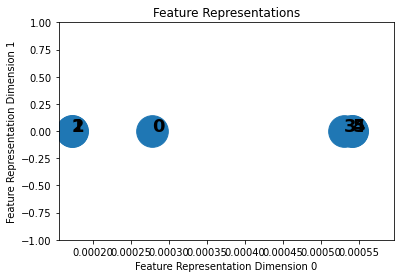

In [ ]:
def plot_features(H2):
  """Visualize our features representation."""
  # Plot the features representation
  x = H2[:,0]
  y = H2[:,1]

  size = 1000

  plt.scatter(x, y, size)
  plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
  plt.ylim([-1, 1])
  plt.xlabel('Feature Representation Dimension 0')
  plt.ylabel('Feature Representation Dimension 1')
  plt.title('Feature Representations')

  for i, row in enumerate(H2):
    str = "{}".format(i)
    plt.annotate(str, (row[0], row[1]), fontsize=18, fontweight='bold')

  plt.show()

plot_features(H2)